# Chennai House Price Prediction using Regression Algortithm

## Problem Statement 

House price prediction based on the customer requirement in the chennai locality

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv

In [2]:
# Load dataset
data = pd.read_csv(r'C:\D drive\Data scientist\Projects\price_prediction\Chennai_houseing_sale.csv')

In [3]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
# Coverting all columns name to lowercase:
data.columns = data.columns.str.lower()

In [5]:
data.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
# Coverting all object values in columns to lowercase: 
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.lower()

In [7]:
data.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,p03210,karapakkam,1004,04-05-2011,131,1.0,1.0,3,abnormal,yes,...,allpub,paved,a,4.0,3.9,4.9,4.330,380000,144400,7600000
1,p09411,anna nagar,1986,19-12-2006,26,2.0,1.0,5,abnormal,no,...,allpub,gravel,rh,4.9,4.2,2.5,3.765,760122,304049,21717770
2,p01812,adyar,909,04-02-2012,70,1.0,1.0,3,abnormal,yes,...,elo,gravel,rl,4.1,3.8,2.2,3.090,421094,92114,13159200
3,p05346,velachery,1855,13-03-2010,14,3.0,2.0,5,family,no,...,nosewr,paved,i,4.7,3.9,3.6,4.010,356321,77042,9630290
4,p06210,karapakkam,1226,05-10-2009,84,1.0,1.0,3,abnormal,yes,...,allpub,gravel,c,3.0,2.5,4.1,3.290,237000,74063,7406250


In [8]:
# Convert the 'date sale' and 'date build' columns to datetime objects
data['date_sale'] = pd.to_datetime(data['date_sale'])
data['date_build'] = pd.to_datetime(data['date_build'])

# Calculate the property age in years and create a new column 'property age'
data['house_age'] = (data['date_sale'] - data['date_build']).dt.days // 365

In [9]:
#Check for unique values in object columns
print('Before correction:')
print(data.area.unique())
print(data.sale_cond.unique())
print(data.park_facil.unique())
print(data.buildtype.unique())
print(data.utility_avail.unique())
print(data.street.unique())
print(data.mzzone.unique())

#Correcting the spelling in the object coulmns:
data.area = data.area.replace({'karapakam':'karapakkam','anna nagar':'annanagar', 'ann nagar':'annanagar', 'ana nagar':'annanagar', 'adyr':'adyar','velchery':'velachery','chrompt':'chrompet','chrmpet':'chrompet','t nagar':'tnagar','kk nagar':'kknagar', 't nagar':'tnagar'})
data.sale_cond = data.sale_cond.replace({'ab normal': 'abnormal', 'partiall':'partial', 'normal sale':'normalsale','adj land':'adjland'})
data.park_facil = data.park_facil.replace({'noo': 'no'})
data.buildtype = data.buildtype.replace({'comercial':'commercial', 'others':'other'})
data.utility_avail = data.utility_avail.replace({'all pub':'allpub', 'nosewr':'nosewer', 'nosewa':'nosewer', 'nosewr ':'nosewer'})
data.street = data.street.replace({'no access':'noaccess', 'pavd':'paved'})

print('-------------------------------------------------------------------')
print('After correction:')
print(data.area.unique())
print(data.sale_cond.unique())
print(data.park_facil.unique())
print(data.buildtype.unique())
print(data.utility_avail.unique())
print(data.street.unique())

Before correction:
['karapakkam' 'anna nagar' 'adyar' 'velachery' 'chrompet' 'kk nagar'
 'tnagar' 't nagar' 'chrompt' 'chrmpet' 'karapakam' 'ana nagar' 'chormpet'
 'adyr' 'velchery' 'ann nagar' 'kknagar']
['abnormal' 'family' 'partial' 'adjland' 'normal sale' 'ab normal'
 'partiall' 'adj land']
['yes' 'no' 'noo']
['commercial' 'others' 'other' 'house' 'comercial']
['allpub' 'elo' 'nosewr ' 'nosewa' 'all pub']
['paved' 'gravel' 'no access' 'pavd' 'noaccess']
['a' 'rh' 'rl' 'i' 'c' 'rm']
-------------------------------------------------------------------
After correction:
['karapakkam' 'annanagar' 'adyar' 'velachery' 'chrompet' 'kknagar'
 'tnagar' 'chormpet']
['abnormal' 'family' 'partial' 'adjland' 'normalsale']
['yes' 'no']
['commercial' 'other' 'house']
['allpub' 'elo' 'nosewer']
['paved' 'gravel' 'noaccess']


In [10]:
# Add the 'reg fee', 'commission', and 'sale price' columns and store the result in a new 'price' column
data['price'] = data['reg_fee'] + data['commis'] + data['sales_price']

In [11]:
data.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,house_age,price
0,p03210,karapakkam,1004,2011-04-05,131,1.0,1.0,3,abnormal,yes,...,a,4.0,3.9,4.9,4.330,380000,144400,7600000,43,8124400
1,p09411,annanagar,1986,2006-12-19,26,2.0,1.0,5,abnormal,no,...,rh,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,p01812,adyar,909,2012-04-02,70,1.0,1.0,3,abnormal,yes,...,rl,4.1,3.8,2.2,3.090,421094,92114,13159200,19,13672408
3,p05346,velachery,1855,2010-03-13,14,3.0,2.0,5,family,no,...,i,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,p06210,karapakkam,1226,2009-05-10,84,1.0,1.0,3,abnormal,yes,...,c,3.0,2.5,4.1,3.290,237000,74063,7406250,29,7717313


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7108 non-null   float64       
 6   n_bathroom     7104 non-null   float64       
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

In [13]:
#Creating a new dataframe by dropping the irrelevant coulmns
clean_data = data.drop(['prt_id', 'date_sale', 'date_build', 'reg_fee', 'commis', 'sales_price'], axis = 1)

## Basic checks

In [14]:
clean_data.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age,price
0,karapakkam,1004,131,1.0,1.0,3,abnormal,yes,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,43,8124400
1,annanagar,1986,26,2.0,1.0,5,abnormal,no,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,11,22781941
2,adyar,909,70,1.0,1.0,3,abnormal,yes,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,19,13672408
3,velachery,1855,14,3.0,2.0,5,family,no,other,nosewer,paved,i,4.7,3.9,3.6,4.010,22,10063653
4,karapakkam,1226,84,1.0,1.0,3,abnormal,yes,other,allpub,gravel,c,3.0,2.5,4.1,3.290,29,7717313


In [15]:
clean_data.shape

(7109, 18)

In [16]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7109 non-null   object 
 1   int_sqft       7109 non-null   int64  
 2   dist_mainroad  7109 non-null   int64  
 3   n_bedroom      7108 non-null   float64
 4   n_bathroom     7104 non-null   float64
 5   n_room         7109 non-null   int64  
 6   sale_cond      7109 non-null   object 
 7   park_facil     7109 non-null   object 
 8   buildtype      7109 non-null   object 
 9   utility_avail  7109 non-null   object 
 10  street         7109 non-null   object 
 11  mzzone         7109 non-null   object 
 12  qs_rooms       7109 non-null   float64
 13  qs_bathroom    7109 non-null   float64
 14  qs_bedroom     7109 non-null   float64
 15  qs_overall     7061 non-null   float64
 16  house_age      7109 non-null   int64  
 17  price          7109 non-null   int64  
dtypes: float

In [17]:
clean_data.columns

Index(['area', 'int_sqft', 'dist_mainroad', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'house_age', 'price'],
      dtype='object')

In [18]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
int_sqft,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
dist_mainroad,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
n_bedroom,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
n_bathroom,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
n_room,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
qs_rooms,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
qs_bathroom,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
qs_bedroom,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
qs_overall,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
house_age,7109.0,2.398495e+01,1.235581e+01,3.0,14.00,23.0,34.00,55.00


In [19]:
clean_data.describe(include='O').T

,count,unique,top,freq
area,7109,8,chrompet,1696
sale_cond,7109,5,adjland,1439
park_facil,7109,2,yes,3587
buildtype,7109,3,house,2444
utility_avail,7109,3,nosewer,3700
street,7109,3,paved,2572
mzzone,7109,6,rl,1858


Observation:
* Here the price coulmn is the target/dependent variable.
* The maximum and minimum square feet of the house are 2500 and 500 respectively.
* The maximum and minimum number of rooms available are 6 and 2 respectively.
* The maximum and minimum age of house are 55 yrs and 3 yrs respectively.
* More number of houses are available in chrompet location.

## Exploratory data analysis (EDA)

In [20]:
#Univariate Analysis:
my_report = sv.analyze(clean_data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
# Segregating categorical and numerical data
data1= clean_data[['area', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail', 'street', 'mzzone']]
data2= clean_data[['int_sqft', 'dist_mainroad','n_bedroom', 'n_bathroom','n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 'house_age']]

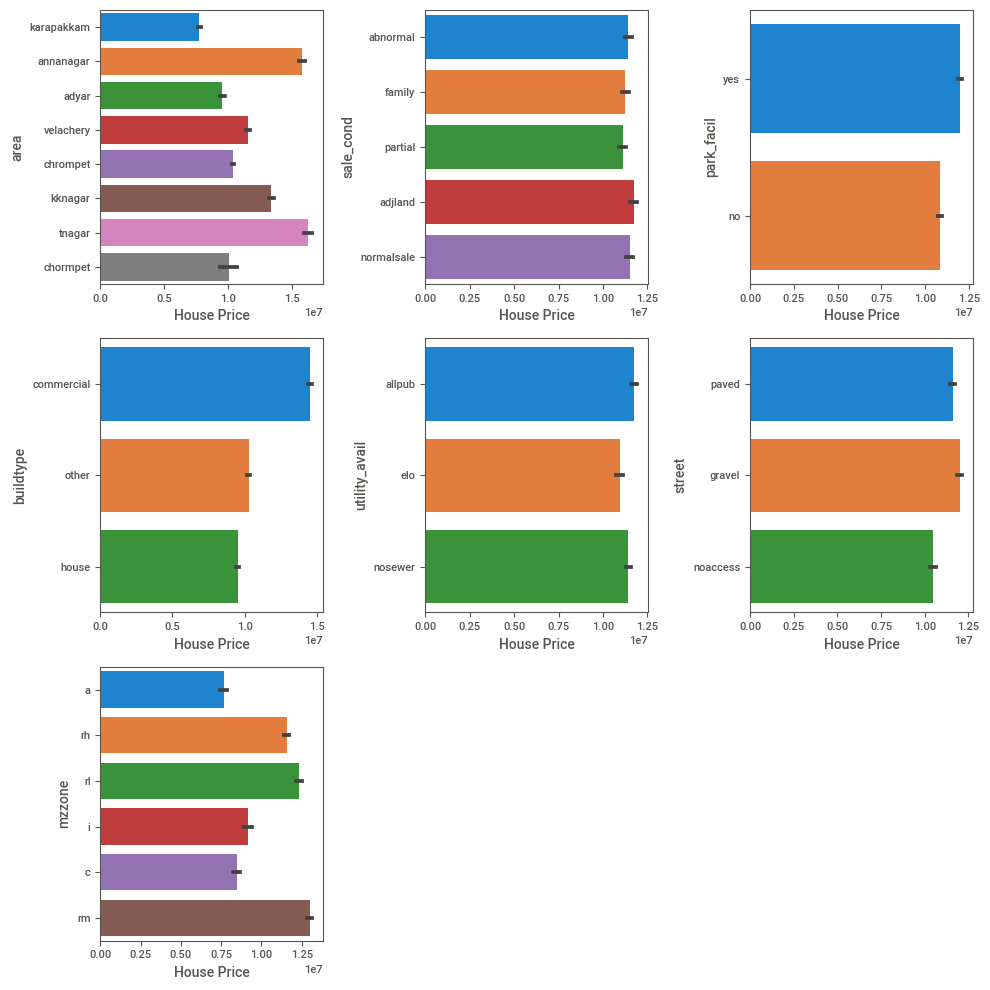

In [22]:
#Bivariate Analysis:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=10:
        ax = plt.subplot(3,3,plotnumber)
        sns.barplot(data = clean_data, y= data1[column], x= 'price')
        plt.xlabel('House Price',fontsize=10)
        plt.ylabel(column, fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

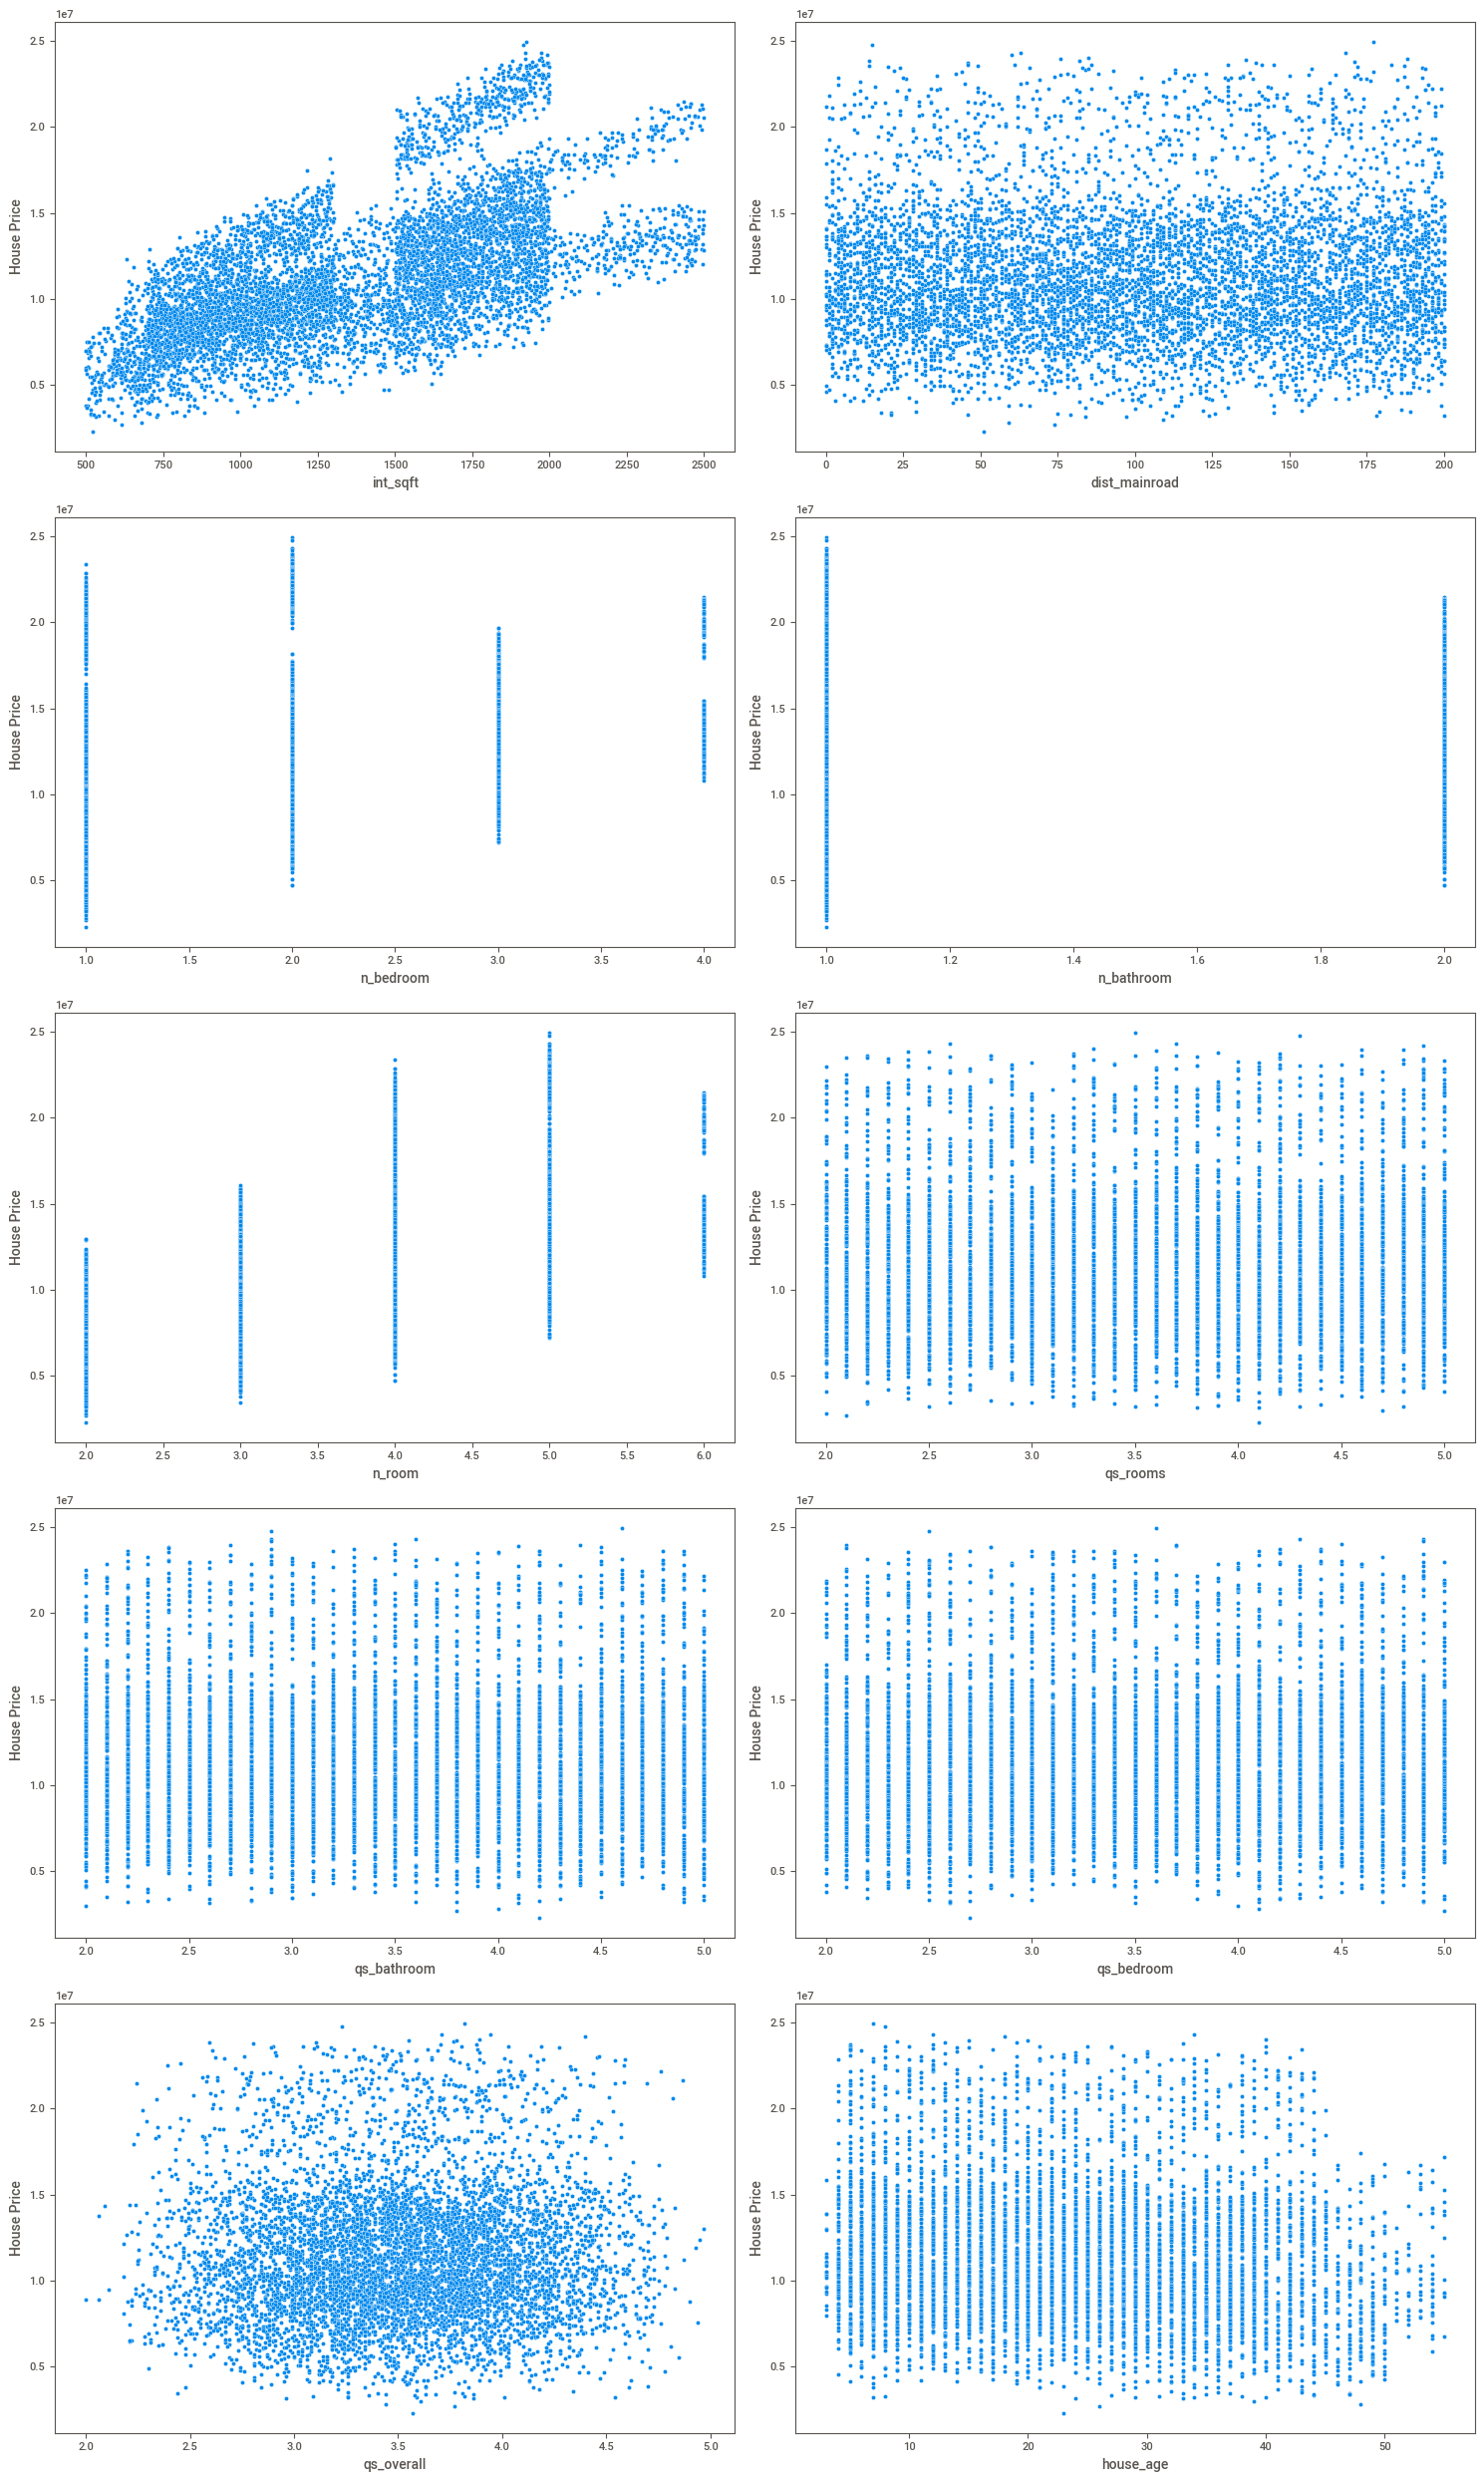

In [23]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=12:
        ax = plt.subplot(5,2,plotnumber)
        sns.scatterplot(data = clean_data, x= data2[column], y= 'price')
        plt.xlabel(column,fontsize=10)
        plt.ylabel('House Price', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights:
* The qs_overall columns only shows the normal distribution.
* More number of houses are available in chrompet and karapakkam area.
* Very less number of houses are in kknagar area.
* More number of houses are available in the range of 1500 to 1750 sq.ft
* Around 53 % of houses available with one bedroom and only 4 % of houses with 4 bedrooms.
* Around 36 % of houses available with 4 rooms.
* Almost 50 % of houses available with parking facility.
* Around 36 % of houses are consist of paved type streets.
* Age of houses are ranging from 3 to 55 yrs.
* The price of houses ranging from 23 lakhs to 25 crore.
* The cost of houses in anna nagar and t nagar are very costly.

## Data preprocessing

In [24]:
# Check for missing values
clean_data.isnull().sum()

area              0
int_sqft          0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
house_age         0
price             0
dtype: int64

In [25]:
clean_data.n_bedroom.median()

1.0

In [26]:
# Handling missing values in int_sqft column
clean_data.loc[clean_data['n_bedroom'].isnull()==True, 'n_bedroom']=clean_data.n_bedroom.median()

In [27]:
# Handling missing values in n_bathroom column
clean_data.loc[clean_data['n_bathroom'].isnull()==True, 'n_bathroom']=clean_data.n_bathroom.median()

In [28]:
#Checking the percentage of missing valuse in qs_overall coulmn
(clean_data.qs_overall.isnull().sum()/len(clean_data))*100

0.6752004501336334

In [29]:
# Handling missing values in qs_overall column
clean_data.loc[clean_data['qs_overall'].isnull()==True, 'qs_overall']=clean_data.qs_overall.median()

In [30]:
clean_data.isnull().sum()

area             0
int_sqft         0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
house_age        0
price            0
dtype: int64

In [31]:
#check for duplicate s
clean_data.duplicated().sum()

0

In [32]:
clean_data.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age,price
0,karapakkam,1004,131,1.0,1.0,3,abnormal,yes,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,43,8124400
1,annanagar,1986,26,2.0,1.0,5,abnormal,no,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,11,22781941
2,adyar,909,70,1.0,1.0,3,abnormal,yes,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,19,13672408
3,velachery,1855,14,3.0,2.0,5,family,no,other,nosewer,paved,i,4.7,3.9,3.6,4.010,22,10063653
4,karapakkam,1226,84,1.0,1.0,3,abnormal,yes,other,allpub,gravel,c,3.0,2.5,4.1,3.290,29,7717313


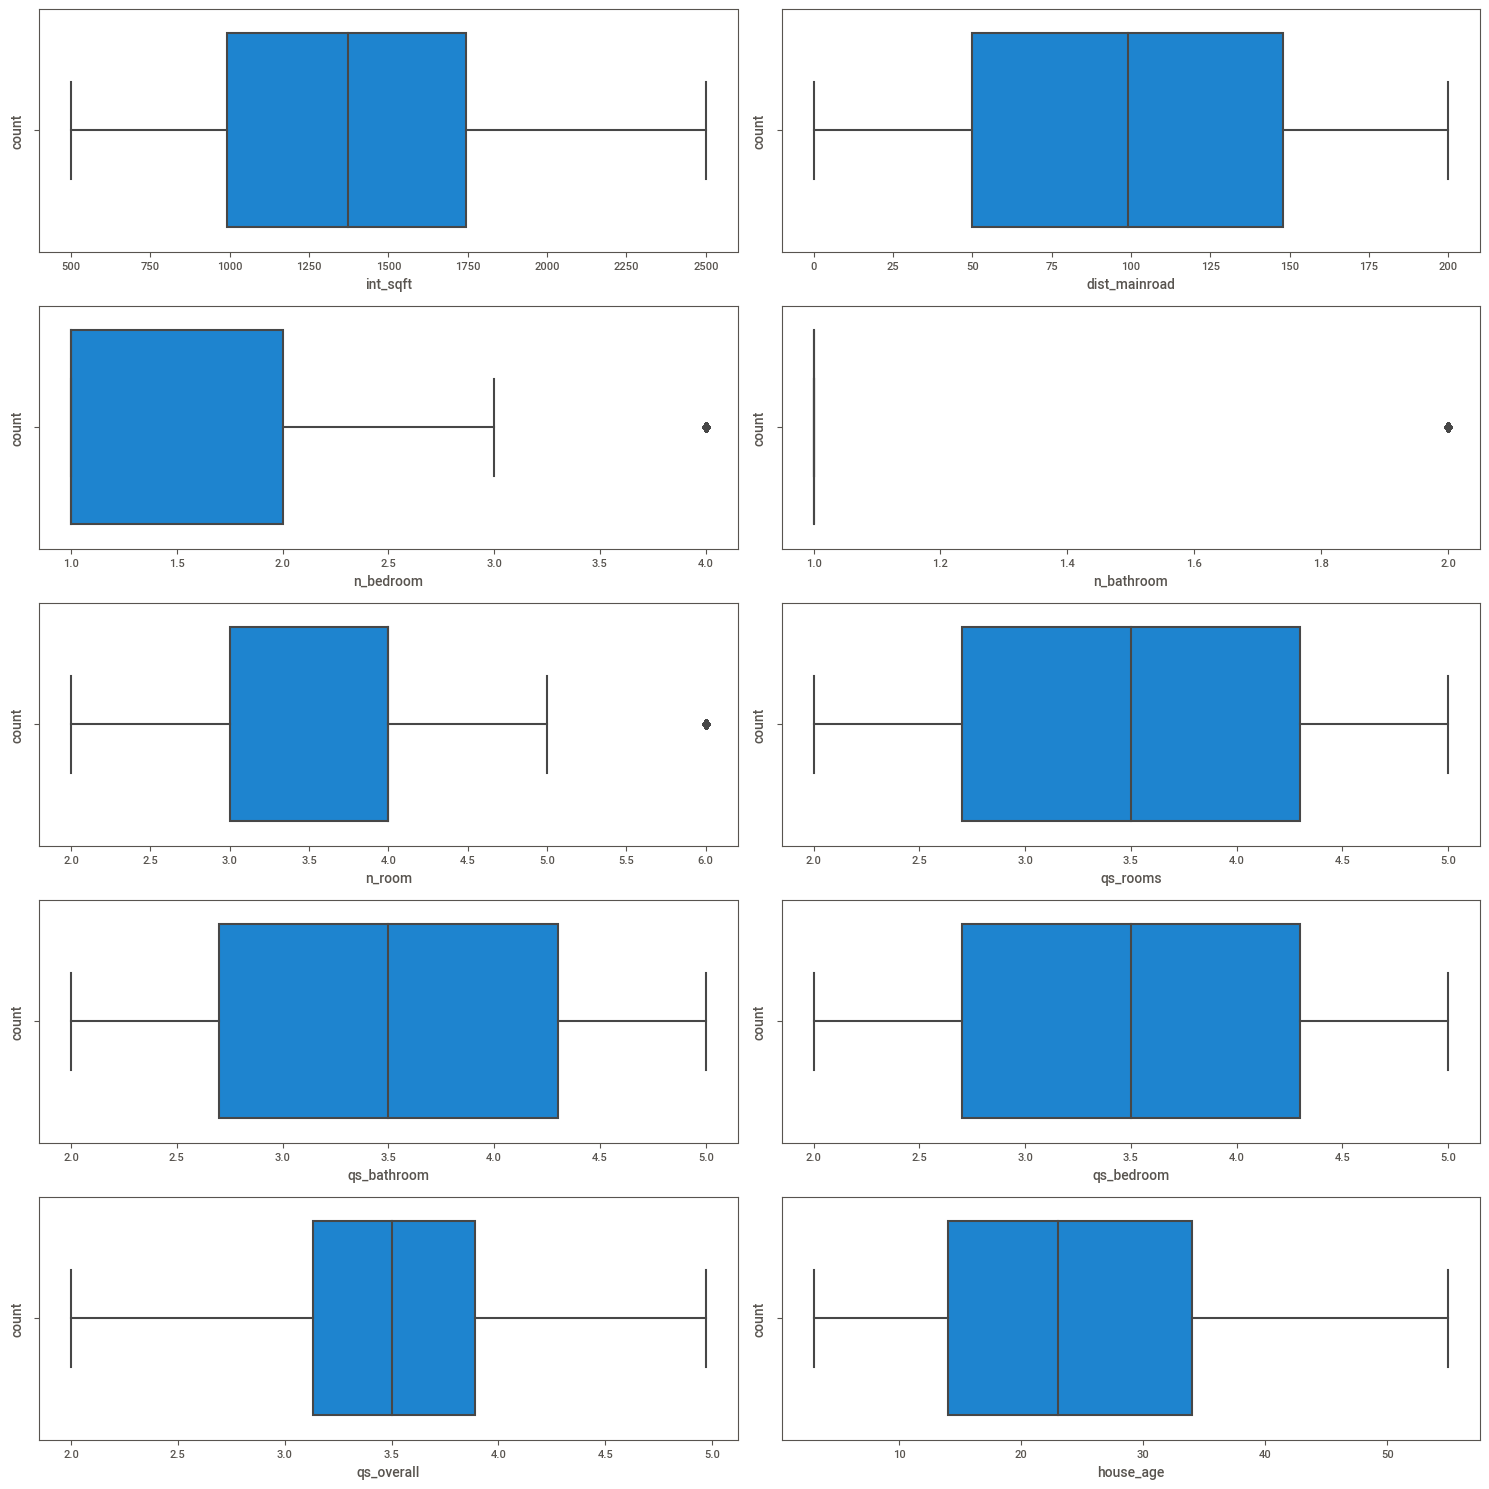

In [33]:
#Check for outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=12:
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(x= data2[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count', fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [34]:
clean_data.n_bedroom.unique()

array([1., 2., 3., 4.])

In [35]:
clean_data.n_bathroom.unique()

array([1., 2.])

In [36]:
clean_data.n_room.unique()

array([3, 5, 4, 2, 6], dtype=int64)

Insights:
* Not necessary to handle the outliers here, since all the values are number of rooms and important for the analysis. Therefore, proceeding with those values.

## Feature Engineering

In [37]:
# checking for the correlation:

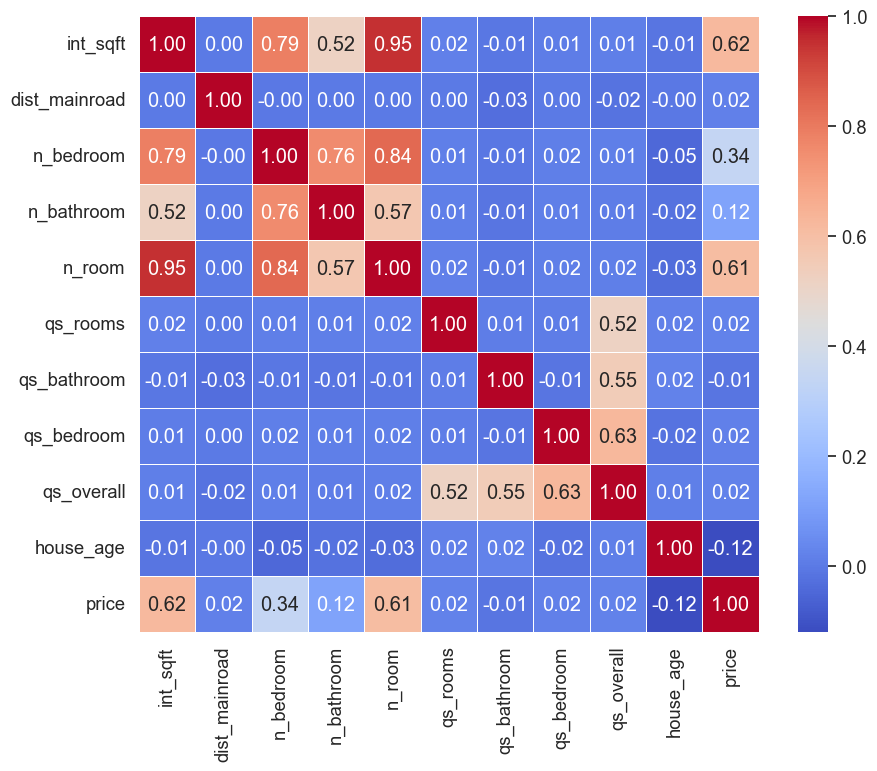

In [38]:
# correlation between input and target:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))  
sns.heatmap(clean_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Observation:
* It is found that dist_mainroad, qs_rooms, qs_bathroom, qs_bedroom and qs_overall has very low correlation with target variable. So, those are dropped.
* House_age has some correlation with the target variable

In [39]:
clean_data.drop(['dist_mainroad', 'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall'], axis =1, inplace=True)

In [40]:
clean_data.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,house_age,price
0,karapakkam,1004,1.0,1.0,3,abnormal,yes,commercial,allpub,paved,a,43,8124400
1,annanagar,1986,2.0,1.0,5,abnormal,no,commercial,allpub,gravel,rh,11,22781941
2,adyar,909,1.0,1.0,3,abnormal,yes,commercial,elo,gravel,rl,19,13672408
3,velachery,1855,3.0,2.0,5,family,no,other,nosewer,paved,i,22,10063653
4,karapakkam,1226,1.0,1.0,3,abnormal,yes,other,allpub,gravel,c,29,7717313


In [41]:
# Manual encoding:
clean_data.area=clean_data.area.map({'karapakkam':1, 'annanagar':2, 'adyar':3, 'velachery':4, 'chrompet':5, 'kknagar':6,
 'tnagar':7, 'chormpet':8})
clean_data.sale_cond=clean_data.sale_cond.map({'abnormal':1, 'family':2, 'partial':3, 'adjland':4, 'normalsale':5})
clean_data.park_facil=clean_data.park_facil.map({'yes':1, 'no':2})
clean_data.buildtype=clean_data.buildtype.map({'commercial':1, 'other':2, 'house':3})
clean_data.utility_avail=clean_data.utility_avail.map({'allpub':1, 'elo':2, 'nosewer':3})
clean_data.street=clean_data.street.map({'paved':1, 'gravel':2, 'noaccess':3})
clean_data.mzzone=clean_data.mzzone.map({'a':1, 'rh':2, 'rl':3, 'i':4, 'c':5, 'rm':6})

In [42]:
clean_data.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,house_age,price
0,1,1004,1.0,1.0,3,1,1,1,1,1,1,43,8124400
1,2,1986,2.0,1.0,5,1,2,1,1,2,2,11,22781941
2,3,909,1.0,1.0,3,1,1,1,2,2,3,19,13672408
3,4,1855,3.0,2.0,5,2,2,2,3,1,4,22,10063653
4,1,1226,1.0,1.0,3,1,1,2,1,2,5,29,7717313


In [43]:
clean_data.columns

Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'sale_cond',
       'park_facil', 'buildtype', 'utility_avail', 'street', 'mzzone',
       'house_age', 'price'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
scaling_ss = StandardScaler()
clean_data[['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'sale_cond', 
       'park_facil', 'buildtype', 'utility_avail', 'street', 'mzzone',
       'house_age']] = scaling_ss.fit_transform(clean_data[['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'sale_cond', 
       'park_facil', 'buildtype', 'utility_avail', 'street', 'mzzone',
       'house_age']])

In [45]:
clean_data.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,house_age,price
0,-1.469812,-0.826608,-0.793373,-0.520409,-0.675845,-1.422209,-0.990898,-1.240402,-1.478178,-1.152931,-1.520673,1.539065,8124400
1,-0.949863,1.320409,0.452230,-0.520409,1.286811,-1.422209,1.009186,-1.240402,-1.478178,0.097631,-0.933084,-1.050993,22781941
2,-0.429914,-1.034314,-0.793373,-0.520409,-0.675845,-1.422209,-0.990898,-1.240402,-0.300374,0.097631,-0.345495,-0.403478,13672408
3,0.090035,1.033994,1.697832,1.921564,1.286811,-0.714093,1.009186,-0.019746,0.877430,-1.152931,0.242094,-0.160660,10063653
4,-1.469812,-0.341234,-0.793373,-0.520409,-0.675845,-1.422209,-0.990898,-0.019746,-1.478178,0.097631,0.829684,0.405915,7717313


## Model Building

In [46]:
# Split data into x and y
x = clean_data.drop('price',axis=1)
y=clean_data.price

In [47]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [48]:
x_train.shape

(4976, 12)

In [49]:
x_test.shape

(2133, 12)

### Linear Regression:

In [50]:
# Model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_lr = model_lr.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MSE = mean_squared_error(y_test,y_lr)
MAE = mean_absolute_error(y_test,y_lr)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_lr)
print('Mean Squared Error:', MSE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R2 Score:', R2)

Mean Squared Error: 2807783496232.749
Mean Absolute Error: 1314592.018479911
Root Mean Squared Error: 1675644.203353668
R2 Score: 0.8109266019569741


In [52]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_lr, x, y, cv=5, scoring='r2')
print("Cross validation score:", scores)
print("Standard deviation:", scores.std())

Cross validation score: [0.80462357 0.8117593  0.82271503 0.80880757 0.82727329]
Standard deviation: 0.008563499449983986


In [53]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
model_r = Ridge()
grid = GridSearchCV(model_r, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)
print("Best Hyperparameters:", grid.best_params_)
print(grid.best_estimator_)

Best Hyperparameters: {'alpha': 1}
Ridge(alpha=1)


In [54]:
lr = Ridge(alpha=1)
lr.fit(x_train, y_train)
y_lr1 = lr.predict(x_test)
R2_best_lr = r2_score(y_test, y_lr1)
print('R2 Score:', R2_best_lr)

R2 Score: 0.8109264618396235


### Decission Tree

In [55]:
# Model
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
y_dt = model_dt.predict(x_test)
MSE = mean_squared_error(y_test,y_dt)
MAE = mean_absolute_error(y_test,y_dt)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_dt)
print('Mean Squared Error:', MSE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R2 Score:', R2)

Mean Squared Error: 612780245584.7539
Mean Absolute Error: 582890.635724332
Root Mean Squared Error: 782802.813986226
R2 Score: 0.9587359768152348


In [56]:
# Cross-validation
score_dt = cross_val_score(model_dt, x, y, cv=5, scoring='r2')
print("Cross validation score:", score_dt)
print("Standard deviation:", score_dt.std())

Cross validation score: [0.96619939 0.96692441 0.96192388 0.96141471 0.96693873]
Standard deviation: 0.0024781483614017903


In [57]:
# Hyperparameter Tuning
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20]}
grid_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='r2')
grid_dt.fit(x_train, y_train)
best_dt = grid_dt.best_estimator_
y_dt1 = best_dt.predict(x_test)
R2_best_dt = r2_score(y_test, y_dt1)
print("Best Hyperparameters:", grid_dt.best_params_)
print("Best R2 Score for DT:", R2_best_dt)

Best Hyperparameters: {'max_depth': None}
Best R2 Score for DT: 0.9603234349981783


### Random Forest

In [58]:
# Model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train, y_train)
y_rf = model_rf.predict(x_test)
MSE = mean_squared_error(y_test,y_rf)
MAE = mean_absolute_error(y_test,y_rf)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_rf)
print('Mean Squared Error:', MSE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R2 Score:', R2)

Mean Squared Error: 263569787836.30264
Mean Absolute Error: 399445.0221612752
Root Mean Squared Error: 513390.48280651117
R2 Score: 0.9822514679374131


In [59]:
# Cross-validation
score_rf = cross_val_score(model_rf, x, y, cv=5, scoring='r2')
print("Cross-validation score:", score_rf)
print("Standard deviation:", score_rf.std())

Cross-validation score: [0.98282291 0.98452289 0.98106414 0.98225966 0.98468542]
Standard deviation: 0.001375620478756686


In [60]:
# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    }

grid_rf = RandomizedSearchCV(model_rf, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(x_train, y_train)
best_rf = grid_rf.best_estimator_
y_rf_best = best_rf.predict(x_test)
R2_best_rf = r2_score(y_test, y_rf_best)
print("Best Hyperparameters:", grid_rf.best_params_)
print("Best R2 Score for RF:", R2_best_rf)

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 20}
Best R2 Score for RF: 0.9824078891622029


### XG Boost

In [61]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()
model_xg.fit(x_train, y_train)
y_xg = model_xg.predict(x_test)
MSE = mean_squared_error(y_test,y_xg)
MAE = mean_absolute_error(y_test,y_xg)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_xg)
print('Mean Squared Error:', MSE)
print('Mean Absolute Error:', MAE)
print('Root Mean Squared Error:', RMSE)
print('R2 Score:', R2)

Mean Squared Error: 75248504846.74074
Mean Absolute Error: 208844.57923112987
Root Mean Squared Error: 274314.6092477408
R2 Score: 0.9949328391850298


In [62]:
# Cross-validation
score_xg = cross_val_score(model_xg, x, y, cv=5, scoring='r2')
print("Cross-validation score:", score_xg)
print("Standard deviation:", score_xg.std())

Cross-validation score: [0.99517237 0.99552478 0.99523631 0.99443064 0.99565267]
Standard deviation: 0.00042528307978179335


In [63]:
# Hyperparameter Tuning
param_grid_xg = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30],
    'gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10],
    'learning_rate' : [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.5, 1],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10],
    'reg_lambda' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10]
    }

grid_xg = RandomizedSearchCV(model_xg, param_grid_xg, cv=5, scoring='r2')
grid_xg.fit(x_train, y_train)
best_xg = grid_xg.best_estimator_
y_xg_best = best_xg.predict(x_test)
R2_best_xg = r2_score(y_test, y_xg_best)
print("Best Hyperparameters:", grid_xg.best_params_)
print("Best R2 Score for XG:", R2_best_xg)

Best Hyperparameters: {'reg_lambda': 10, 'reg_alpha': 0.6, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.5}
Best R2 Score for XG: 0.9940353244560346


### R2 Scores of all the model:

In [64]:
print("R2 Score of Linear Regression:", R2_best_lr)
print("R2 Score of Decision Tree:", R2_best_dt)
print("R2 Score of Random Forest:", R2_best_rf)
print("R2 Score of XG Boost:", R2_best_xg)

R2 Score of Linear Regression: 0.8109264618396235
R2 Score of Decision Tree: 0.9603234349981783
R2 Score of Random Forest: 0.9824078891622029
R2 Score of XG Boost: 0.9940353244560346


## Summary

##### After using different supervised machine learning models for Chennai house price prediction. It has been found that the XG Boost model outperforms the other models and exhibiting the highest R2 score of 0.994. 
##### This suggests that XGBoost is particularly well-suited for accurately predicting house prices in the Chennai real estate market and showcasing its robust performance in this specific predictive modeling task.